## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with Consumer Complaint Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


The consumer complaint dataset comprises around 5000 complaints on six products.

In [3]:
# Read the csv file consumer_complaints.csv
from google.colab import files
import io
uploaded=files.upload()

# Import the data.csv only use 'text' and 'target' columns
mydata_train = df = pd.read_csv(io.StringIO(uploaded['consumer_complaints.csv'].decode('utf-8')))

#mydata_train = df = pd.read_csv("/Users/bindulathabanisetti/Downloads/consumer_complaints.csv", sep = ',', encoding = 'latin-1')

Saving consumer_complaints.csv to consumer_complaints (1).csv


In [4]:
# Print the product groups in the dataset
print(list(mydata_train.Product))

['Credit card or prepaid card', 'Mortgage', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Vehicle loan or lease', 'Debt collection', 'Debt collection', 'Mortgage', 'Vehicle loan or lease', 'Mortgage', 'Credit card or prepaid card', 'Checking or savings account', 'Credit card or prepaid card', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Mortgage', 'Mortgage', 'Student loan', 'Mortgage', 'Mortgage', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Credit card or prepaid card', 'Mortgage', 'Mortgage', 'Credit card or prepaid card', 'Debt collection', 'Debt collection', 'Credit card or prepaid card', 'Checking or savings account', 'Debt collection', 'Debt collection', 'Vehicle loan or lease', 'Student loan', 'Vehicle loan or lease', 'Debt collection', 'Checking or savings account', 'Debt collection', 'Debt collection', 'Student loan', 'Student loan', 'Mortgage', 'Checking or savings account', 'Student loan', 'Vehicle loan or l

In [5]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [6]:
# Check the length of the data
print(len(mydata_train.Product))
print(len(mydata_train.Consumer_complaint_narrative))




5000
5000


### Expected Output: 
5000

5000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [7]:
text = mydata_train.Consumer_complaint_narrative
text[:10]

0    I lost my credit card ( a Chase Sapphire Reser...
1    Having problems finding out LTV from mortgage ...
2    I am a victim of identity theft and this debt ...
3    Yesterday evening I spoke to a rep in regards ...
4    I opened a prepaid bank account with REVOLUT i...
5    I had a payment with American Honda Finance sc...
6    My husband and I owed a balance to XXXX XXXX X...
7    On XX/XX/19 I received a phone call from an un...
8    I am the seller of a property and the buyers a...
9    Why is the federal government letting these lo...
Name: Consumer_complaint_narrative, dtype: object

## Preprocessing the Corpus

In [9]:
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing the data

lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    punc='''...!~`@%^&$#*()?-_+={}[]|'\/<>,.;:"'''
    
    #Removing punctuations and special characters
    line_no_punc = [ch for ch in list(line) if ch not in punc]
    line_no_punc = "".join(line_no_punc)
    
    #Removing hyperlinks
    line_no_punc_h = re.sub(r'https?://\S+|www\.\S+|ftp://\S+|(<br />)','',line_no_punc)
    
    #Removing stop words
    words_list = [word.lower() for word in line_no_punc_h.split() if word.lower() not in stopwords.words('english')]
    
    #REplacing all similar words with its stem word
    lemmatizer = WordNetLemmatizer()
    stem_tokens = [lemmatizer.lemmatize(word) for word in words_list]
    
    word_list = word_list + stem_tokens
        
    line_cleaned = " ".join(stem_tokens)
    lines.append(line_cleaned)
    
#word_list contains unique tokens
word_list = list(set(word_list))
    
# Calculate the total documents present in the corpus
total_docs = len(text)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
for index, word in zip(list(range(len(word_list))),word_list):
    dict_idx[index] = word

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for word in word_list:
        word_no_of_docs = 0
        for line in lines:
            if word in line:
                word_no_of_docs += 1
        freq_word[word] = word_no_of_docs
    
    return freq_word

In [11]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

#freq_word

In [12]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    tf = document.count(word) / len(document.split())     
    
    return tf

In [13]:


lines[:2]

['lost credit card chase sapphire reserve late night xxxx2020 early morning xxxx2020 made one purchase time xxxx xxxx xxxx amount 1900 called chase soon found card lost xxxx2020 also realized fraud charge 4300 xxxx xxxx xxxx xxxx posted account xxxx2020 informed chase unauthorized helped take statement however received letter early xxxx responsible transaction according single sheet letter chase sent received benefit transaction proof using card transaction even bother ask store signed copy receipt thing like security surveillance prove using card disputed transaction agent took seriously sent stuff like signed receipt back claim called chase xxxx2020 nice lady picked phone said pas concern fraud department let reinvestigate however two week passed response heard disappointed chase treating one loyal customer taking money good guy instead fraud',
 'problem finding ltv mortgage servicer trying find pmi removed']

In [14]:
# Create a function to calculate the Inverse Document Frequency
import numpy as np
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    idf = np.log(total_docs/(freq_word[word]))
    
    return idf

In [15]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_list = []
    for index in dict_idx.keys():
        tf = term_frequency(sentence,dict_idx[index])
        idf = inverse_df(dict_idx[index])
        tf_idf_list.append(tf*idf)
    tf_idf_vec = tf_idf_list
        
    return tf_idf_vec

In [18]:
import pandas as pd

#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
corpus_tf_idf_encoding=[]
for line in lines:
    tf_idf_vec = tfidf(line,dict_idx)
    corpus_tf_idf_encoding.append(tf_idf_vec)
    
#To check the number of columns in training dataset after its vectoriztion
print(len(corpus_tf_idf_encoding[0]),len(word_list))
corpus_tf_idf_encoding = pd.DataFrame(corpus_tf_idf_encoding)
corpus_tf_idf_encoding[:2]

15640 15640


,0,1,2,3,4,5,6,7,8,9,...,15630,15631,15632,15633,15634,15635,15636,15637,15638,15639
0,0.025878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Multinomial Naive Bayes (10 Points)

In [19]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.naive_bayes import MultinomialNB

product = pd.DataFrame(mydata_train.Product)

clf = MultinomialNB(alpha=0.1)
model = clf.fit(corpus_tf_idf_encoding,mydata_train.Product)



In [20]:
#Perform testing on the train dataset

predicted_prod = model.predict(corpus_tf_idf_encoding)



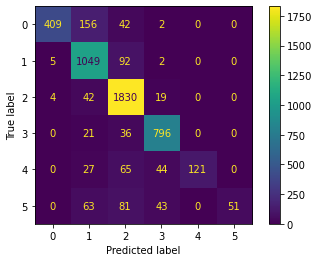

F1 Score:  0.8512000000000001
Accuracy:  0.8512


In [22]:
#Calculate the F1 Score and the Accuracy
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

confusion_mat = metrics.confusion_matrix(mydata_train.Product,predicted_prod)
confusionMatrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat)

confusionMatrixDisplay.plot()
plt.show()

#FI score is the harmonic mean of Precision and Recall
#PRecision - is the proportion of true positives(product) out of all predicted positives 
#Recall - is the proportion of true positives(product) out of all actual positives 
F1_score = f1_score(mydata_train.Product,predicted_prod,average='micro')
Accuracy = accuracy_score(mydata_train.Product,predicted_prod)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

### Expected Output:
F1 Score: 0.8081311697005633

Accuracy: 0.826

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [ ]:
#install libraries
%pip install wikipedia


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=d9cf7c97a8d5ba945c6b9963a9faee3e959504b4d1fdfc6d1549169a8b0c2073
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
import wikipedia
from wikipedia.exceptions import WikipediaException
import random 

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Northeastern University", "Natural language processing", "Artificial intelligence",  "Data science",
          "Bank of America", "Visa Inc.", "European Central Bank", "Financial technology",
         "Basketball", "Volleyball", "Softball", "Football",
         "tuv","suv","xuv","muv"]

# list of articles to be downloaded
articles = []
data_dict = {'category':[],
             'topic':[],
             'article':[],
            'summary':[]}

# download and store articles (summaries) in this variable
data = []

for topic in topics:
    try:
        topic_articles_title_list = wikipedia.page(topic).links
        random.shuffle(topic_articles_title_list)
        for article in topic_articles_title_list[:4]:
            try:
                article_content = wikipedia.page(article).summary
                data.append(article_content)
                articles.append(article)
                if topic in ["Northeastern University", "Natural language processing", "Artificial intelligence", "Data science"]:
                    data_dict['category'].append('Academics')
                elif topic in ["Bank of America", "Visa Inc.", "European Central Bank", "Financial technology"]:
                    data_dict['category'].append('Banks')
                elif topic in ["Basketball", "Volleyball", "Softball", "Football"]:
                    data_dict['category'].append('Sports')
                elif topic in ["tuv","suv","xuv","muv"]:
                    data_dict['category'].append('Cars')
                data_dict['topic'].append(topic)
                data_dict['article'].append(article)
                data_dict['summary'].append(article_content)
            except WikipediaException:
                continue
    except WikipediaException:
        continue
        





/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

1) Cleaning the data helps in obtaining the good quality grouping of the similar data points when we dont know the output labels. 

2) Cleaned data will always improve the overall productivity and most-quality data is  used in the decision-making to determine the similarity between the articles(data-points). 

3) By cleaning the data we are having the tokens which are stemmed in the corpus, because of which we are improving the overall performance and run time of the clustering algorithm.

In [ ]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

def clean_message(message):
    punc='''...!~`@%^&$#*()?-_+={}[]|'\/<>,.;:"'''
    
    #Removing all special characters
    rev_no_punc=[ch for ch in list(message) if ch not in punc]
    rev_nopunc_st="".join(rev_no_punc)
    
    #Removing links of websites
    rev_nopunc_st=re.sub(r'https?://\S+|www\.\S+|ftp://\S+|(<br />)','',rev_nopunc_st)
    
    #Removing stopwords
    rev_nopunc_words_list=rev_nopunc_st.split()
    tokens=[word.lower() for word in rev_nopunc_words_list if word.lower() not in stopwords.words("english")]

    #Reducing the number of tokens by keeping only stem words
    lemmatizer=WordNetLemmatizer()
    stem_tokens=[lemmatizer.lemmatize(token) for token in tokens]
    
    #should we need to remove duplicate words?
    message=" ".join(stem_tokens)

    return message



### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_cleaned = [clean_message(article_content) for article_content in data]
tf_vect = TfidfVectorizer()
X = tf_vect.fit_transform(data_cleaned)


In [ ]:
print(X.shape)

(35, 1984)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [ ]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsn = TSNE(n_components=2,perplexity=9,n_iter=500,init='random',learning_rate=30)
#tsn = TSNE()
tsn_model = tsn.fit_transform(X)

len(tsn_model[:,1])

35

In [ ]:
data_dict['x']=tsn_model[:,0]
data_dict['y']=tsn_model[:,1]
print(set(data_dict['topic']))

len(data_dict['x'])

{'Financial technology', 'Basketball', 'Artificial intelligence', 'Volleyball', 'Football', 'Softball', 'xuv', 'Data science', 'European Central Bank', 'Natural language processing'}


35

Plot and annotate the points with different markers for different expected groups.

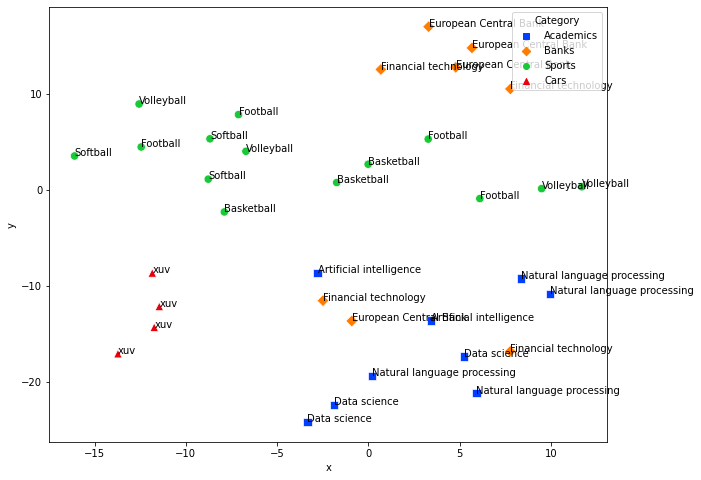

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import markers

#all_shapes = list(markers.MarkerStyle.markers.keys())

all_shapes = [',', 'D', 'o', '^', 'H', '<', '>', 'v', 's', 'p', '*', 'h', '8', 'P', 'd', '.', 'X']

n=len(set(data_dict['category']))

palette=sns.color_palette("bright",n)

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='x', 
                y='y', 
                s=70,
                hue='category', 
                style='category',
                markers=all_shapes[:n],
                data=data_dict,
                palette=palette)

for article_index in range(len(data_dict['x'])):
    #Annotating the point - pass x-cord, y-coord, and the annotate-text
    plt.text(data_dict['x'][article_index],data_dict['y'][article_index],data_dict['topic'][article_index])
    plt.legend(title="Category")

plt.show()


In [ ]:
len(set(data_dict['topic']))

len(set([21,4,5,6,6,7,7]))

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  
  1. The categorization done by T-SNE is determined by the size of the dataset we are working on and the parameters we pass while building T-SNE model. 

2. Specifically, Perplexity is related to determine the nearest neighbours for a data point. And it should not be more than the number of samples. And it can vary from 5 to 50. As in our dataset the number of samples are around 40 to 60. I chose to give 9 as perplexity. 

3. Yes, **mostly the articles of related topics are clustered together**, except few of Bank related topics mixed up with the Academics of Data Science related. As we could see that although 'Financial technology' is belonged to Banks category,  its related articles might mention about using Data Science to provide the banking-solution , So few of the topics from Bank category is mixed up in the cluster of Academics category.


# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
from sklearn.model_selection import train_test_split
import re
from nltk.stem import WordNetLemmatizer


stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [3]:
import pandas as pd
import io 

from google.colab import files
uploaded=files.upload()

# Import the data.csv only use 'text' and 'target' columns
#data = pd.read_csv("/Users/bindulathabanisetti/Downloads/data.csv")
data = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))

# data
data = data[['text','target']]

# and printout the train.shape and validation.shape 
#text_train,text_test,target_train,target_test = train_test_split(data['text'],data['target'],test_size=0.3)
#print(text_train.shape)
#print(text_test.shape)

# expected shape of dataset is (7613, 2)
print(data.shape)



Saving data.csv to data (3).csv
(7613, 2)


In [4]:
# clean the text in the dataframe using the clean_text function provided above
text_train_cleaned = [clean_text(tweet) for tweet in data.text]

    
print(len(text_train_cleaned))



7613


In [5]:
# initialise count vectorizer from sklearn module with default parameter
cv_vector = CountVectorizer()

# fit and transform on dataset
text_train_c_v = cv_vector.fit_transform(text_train_cleaned)
#text_test_c_v = cv_vector.fit_transform(text_test_cleaned)

In [6]:
# get the values of target column

y = data.target

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [7]:
%pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
%pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Activation
from keras.regularizers import l2

In [10]:


tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

    # layer 1 : input layer
    inp = tf.keras.Input((text_train_c_v.shape[1],))
  
    # layer 2 : add the dense layer with 64 units and relu activation
    layer2 = tf.keras.layers.Dense(units=64,activation='relu')(inp)
      
    # layer 3 : add the dropout layer with dropout rate of 0.5
    layer3 = tf.keras.layers.Dropout(rate=0.5)(layer2)
      
    # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    layer4 = tf.keras.layers.Dense(units=32,activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer3)
      
    # layer 5 : add the dropout layer with dropout rate of 0.5
    layer5 = tf.keras.layers.Dropout(rate=0.5)(layer4)
      
    # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
    layer6 = tf.keras.layers.Dense(units=16,activation='tanh',kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer5)
      
    # layer 7 : add the dropout layer with dropout rate of 0.5
    layer7 = tf.keras.layers.Dropout(rate=0.5)(layer6)
      
    # layer 8 : output layer with units equal to 1 and activation as sigmoid
    layer8 = tf.keras.layers.Dense(units=1,activation='sigmoid')(layer7)
      
    # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
    tf_optimizer = tf.keras.optimizers.RMSprop()
    model = tf.keras.models.Model(inputs=inp,outputs=layer8)
    model.compile(optimizer=tf_optimizer, loss='BinaryCrossentropy', metrics=['AUC'])
    return model


In [11]:
print(text_train_c_v.shape)
print(y.shape)

(7613, 16362)
(7613,)


Epoch 1/5
381/381 [==============================] - 6s 12ms/step - loss: 0.7887 - auc: 0.7074 - val_loss: 0.6507 - val_auc: 0.7296
Epoch 2/5
381/381 [==============================] - 4s 12ms/step - loss: 0.5039 - auc: 0.8670 - val_loss: 0.6407 - val_auc: 0.7301
Epoch 3/5
381/381 [==============================] - 4s 12ms/step - loss: 0.4337 - auc: 0.8958 - val_loss: 0.6331 - val_auc: 0.7353
Epoch 4/5
381/381 [==============================] - 4s 11ms/step - loss: 0.4029 - auc: 0.9081 - val_loss: 0.6359 - val_auc: 0.7351
Epoch 5/5
381/381 [==============================] - 4s 12ms/step - loss: 0.3846 - auc: 0.9155 - val_loss: 0.6275 - val_auc: 0.7355


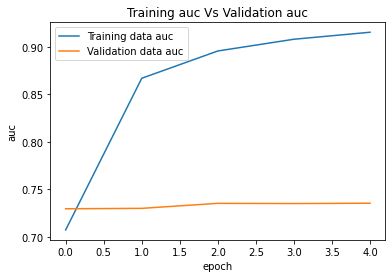

Epoch 1/5
381/381 [==============================] - 7s 16ms/step - loss: 0.7767 - auc: 0.7620 - val_loss: 0.6795 - val_auc: 0.7003
Epoch 2/5
381/381 [==============================] - 4s 11ms/step - loss: 0.4717 - auc: 0.8879 - val_loss: 0.6959 - val_auc: 0.7043
Epoch 3/5
381/381 [==============================] - 4s 11ms/step - loss: 0.4071 - auc: 0.9103 - val_loss: 0.7137 - val_auc: 0.7066
Epoch 4/5
381/381 [==============================] - 4s 11ms/step - loss: 0.3788 - auc: 0.9204 - val_loss: 0.7340 - val_auc: 0.7017
Epoch 5/5
381/381 [==============================] - 4s 12ms/step - loss: 0.3560 - auc: 0.9275 - val_loss: 0.7364 - val_auc: 0.7005


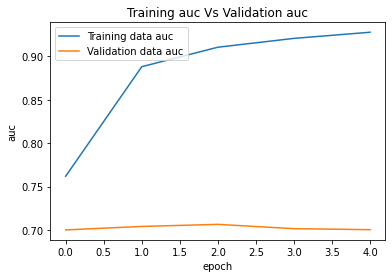

Epoch 1/5
381/381 [==============================] - 6s 14ms/step - loss: 0.7916 - auc: 0.7617 - val_loss: 0.6586 - val_auc: 0.7547
Epoch 2/5
381/381 [==============================] - 4s 12ms/step - loss: 0.4751 - auc: 0.8837 - val_loss: 0.6326 - val_auc: 0.7593
Epoch 3/5
381/381 [==============================] - 4s 11ms/step - loss: 0.4091 - auc: 0.9067 - val_loss: 0.6754 - val_auc: 0.7584
Epoch 4/5
381/381 [==============================] - 4s 12ms/step - loss: 0.3813 - auc: 0.9159 - val_loss: 0.6767 - val_auc: 0.7594
Epoch 5/5
381/381 [==============================] - 4s 12ms/step - loss: 0.3623 - auc: 0.9230 - val_loss: 0.6648 - val_auc: 0.7602


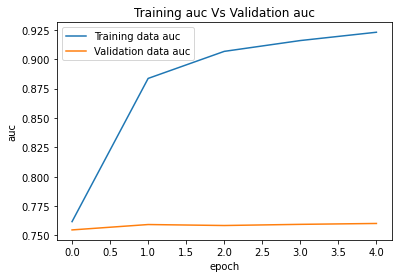

Epoch 1/5
381/381 [==============================] - 6s 12ms/step - loss: 0.7896 - auc: 0.7263 - val_loss: 0.6729 - val_auc: 0.7169
Epoch 2/5
381/381 [==============================] - 4s 11ms/step - loss: 0.4809 - auc: 0.8797 - val_loss: 0.6695 - val_auc: 0.7291
Epoch 3/5
381/381 [==============================] - 4s 11ms/step - loss: 0.4149 - auc: 0.9074 - val_loss: 0.6591 - val_auc: 0.7292
Epoch 4/5
381/381 [==============================] - 4s 12ms/step - loss: 0.3878 - auc: 0.9175 - val_loss: 0.6547 - val_auc: 0.7295
Epoch 5/5
381/381 [==============================] - 5s 12ms/step - loss: 0.3651 - auc: 0.9250 - val_loss: 0.6829 - val_auc: 0.7307


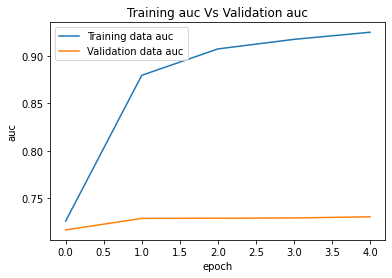

Epoch 1/5
381/381 [==============================] - 7s 16ms/step - loss: 0.7889 - auc: 0.7098 - val_loss: 0.5587 - val_auc: 0.8493
Epoch 2/5
381/381 [==============================] - 5s 14ms/step - loss: 0.5030 - auc: 0.8669 - val_loss: 0.5033 - val_auc: 0.8553
Epoch 3/5
381/381 [==============================] - 6s 15ms/step - loss: 0.4367 - auc: 0.8970 - val_loss: 0.5054 - val_auc: 0.8557
Epoch 4/5
381/381 [==============================] - 6s 15ms/step - loss: 0.4078 - auc: 0.9089 - val_loss: 0.4976 - val_auc: 0.8549
Epoch 5/5
381/381 [==============================] - 6s 15ms/step - loss: 0.3876 - auc: 0.9136 - val_loss: 0.5170 - val_auc: 0.8555


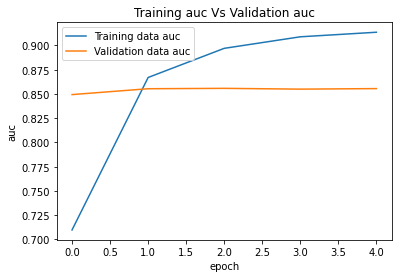

In [12]:
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=5)

# Now Split the countvectors and target (y)
splits = skf.split(text_train_c_v,y)

# iterate through the train and valid index in splits for 5 folds
for train_index,valid_index in splits:
    # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = text_train_c_v[train_index], text_train_c_v[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    X_train = X_train.toarray()
    X_valid = X_valid.toarray()
    
    #call the build_model function and initialize the model
    model = build_model(X_train)

    # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
    # adjust batch size according to your computation power (suggestion use : 16)
    train_model_fit = model.fit(x=X_train,y=y_train,epochs=5,batch_size=16,validation_data=(X_valid,y_valid))

    # plot the graph between training auc and validation auc
    plt.plot(train_model_fit.history['auc'])
    plt.plot(train_model_fit.history['val_auc'])
    plt.title('Training auc Vs Validation auc')
    plt.xlabel('epoch')
    plt.ylabel('auc')
    plt.legend(['Training data auc','Validation data auc'],loc='upper left')
    plt.show()

### Q) Comment on the plots. How did it varied across different folds for neural networks?

**AUC and ROC - curve**: 
Receiver Operating Characteristic curve represents how well our model classifies the data.
1. When we use the model to classify the data we construct the Confusion Matrix comprising of True postives, False positives , True negatives and False negatives
2. In our question we are classifying whether the tweets are about disaster or not. And in general each tweet is given a probability for each class. And as per the ROC curve functionality, if the probability is higher than the likelihood-threshold will classify that tweet is about disaster. 
3. We know that False Positive Rate - out of all non-disaster tweets how many times the model mis-classified it is about diaster. FPR =  FP/(FP+TN)
4. True Positive Rate - out of all disaster tweets how many times the model classified correctly. TPR = TP/(TP+FN)
5. As the likelihood-threshold(discussed in pt.2) increases, the FPR and TPR will be decreased. 
6. And the graph of ROC will be drawn by taking FPR on positive axis and TPR on y-axis at different likelihood-thresholds. So  at threshold 0 - corresponds the ROC curve at (1,1). And at threshold 1 - corresponds to the ROC curve at (0,0)
7. **AUC is area under the curve of ROC** - the higher the AUC the better the performance of the model in distinguishing the classes. 

So **observations** from above plots are:

8. The AUC of the training-data is always significantly higher than that of 
the validation-data. Unlike the training-data , the AUC of the vallidation data is plateaued around 0.75 in first,second,third,fourth folds and around 0.85 in fifth fold.
9. The tensor flow model gives the highest performance for classifying the tweets on validation-data at the fifth fold for which the AUC is 0.85
10. The AUC in first fold for the training-data is 0.91 and for validation-data is 0.73
11. The AUC in second fold for the training-data is 0.92 and for validation-data is 0.70
12. The AUC in third fold for the training-data is 0.92 and for validation-data is 0.76
13. The AUC in first fold for the training-data is 0.92 and for validation-data is 0.73
14. The AUC in first fold for the training-data is 0.91 and for validation-data is 0.85


# Building Multinomial Navie Bayes on Countvectors

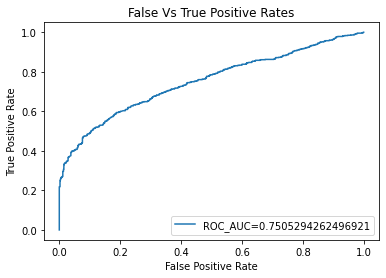

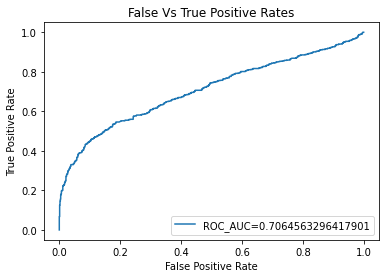

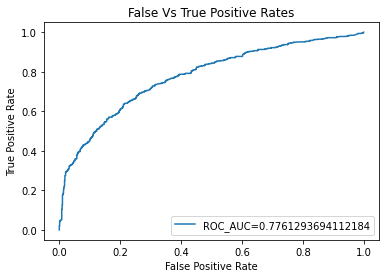

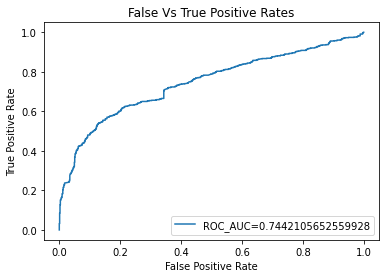

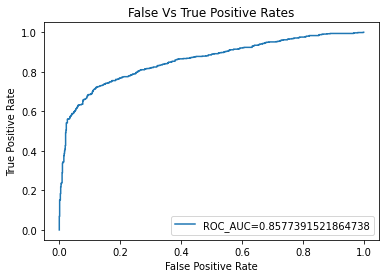

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve,roc_auc_score

# Now Split the countvectors and target (y)
splits = skf.split(text_train_c_v,y)
# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
for train_index, valid_index in splits:
    # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = text_train_c_v[train_index], text_train_c_v[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    X_train = X_train.toarray()
    X_valid = X_valid.toarray()

    # intialise multinomial navie bayes with default parameters
    mnb_model = MultinomialNB()
    # fit the data
    train_model_fit = mnb_model.fit(X_train,y_train)
    y_pred = train_model_fit.predict_proba(X_valid)[::,1]
    # plot AUC-ROC curve for validation data
    fpr, tpr, thresholds = roc_curve(y_valid,y_pred)
    roc_auc = roc_auc_score(y_valid,y_pred)
    plt.plot(fpr,tpr,label="ROC_AUC="+str(roc_auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.title("False Vs True Positive Rates")
    plt.show()
    
    

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

**ROC - curve**: 
Receiver Operating Characteristic curve represents how well our model classifies the data.
1. When we use the model to classify the data we construct the Confusion Matrix comprising of True postives, False positives , True negatives and False negatives
2. In our question we are classifying whether the tweets are about disaster or not. And in general each tweet is given a probability for each class. And as per the ROC curve functionality, if the probability is higher than the likelihood-threshold will classify that tweet is about disaster. 
3. We know that False Positive Rate - out of all non-disaster tweets how many times the model mis-classified it is about diaster. FPR =  FP/(FP+TN)
4. True Positive Rate - out of all disaster tweets how many times the model classified correctly. TPR = TP/(TP+FN)
5. As the likelihood-threshold(discussed in pt.2) increases, the FPR and TPR will be decreased. 
6. And the graph of ROC will be drawn by taking FPR on positive axis and TPR on y-axis at different likelihood-thresholds. So  at threshold 0 - corresponds the ROC curve at (1,1). And at threshold 1 - corresponds to the ROC curve at (0,0)
7. AUC is area under the curve of ROC - the higher the AUC the better the performance of the model in distinguishing the classes. 

So **observations** from above graph are:

8. The roc_curves looks similar for all the folds, except for the fifth fold which has the highest ROC_AUC_score 0.85
9. The roc_auc_score is lowest in the second fold which is about 0.7
10. In the first, third and fourth folds the roc_auc_score almost around 0.75 
11. Indicating that the Multinomial Naive Bayes models' performance for classifying the tweets is highest in the fifth fold , and then in first, third and fourth folds. 

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

**Count Vectorizer**: It counts the frequency of a word in the document. It is simply term/token counts. It does not look for the relative importance of word in the entire corpus

**TF-IDF**: Term-frequency Inverse Document Frequency is better than count vectorizer, as it takes into consideration relative importance of word with respect to entire corpus(through IDF) along with Term Frequency(TF). Hence TF-IDF vector values will be higher for the more-important words and will be lower for the less-important words, and there by TF-IDF helps in summarizing the articles most efficiently than by using CountVectorizer

**Word2Vec** : In Word2Vec, unlike TF-IDF takes the context of words in the corpus into consideration. The relationship between the words is derived by the cosine-distance between the words. Semantically similar words(vectors) are close to eachother. It leverages co-occurences within the local context that is with neighbouring words.

**Glove** : In Glove as well, basically, the relationship between the words is derived by using the cosine-distance between the words. And the words which are similar has the higher cosine value. This model is based on global word-to-word co-occurence counts leveraging the entire corpus(not only with neighbouring-words like Word2Vec)





What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

1. Bag of words is just the vector representation of whole text document corpus, where the number of unique tokens will be number of columns and the values in each vector(document) corresponds to the number of occurences of word in that particular document. 
2. So in Bag of words we can see the frequency of word in the document-wise but not with respect to entire corpus. 
3. On the other hand, in the TF-IDF, the Term Frequency - Inverse Document Frequency reflects how important is the word to that particular document. 
4. It takes into account relative importance of word by considering all the documents. 
5. The Tf-IDF value of word in a document will be higher if the word-frequency in that document is higher and if the word frequency throughout all the documents is lower. 
6. Since inverse-document function is log of total number of documents divided by the number of documents containing that word, the lesser frequent word throughout all the documents will be having higher IDF value
7. Finally, the bag of words is simply the term-frequency alone(number of occurences of the word in a document) it doesn't reveal anything about the relative importance of word with respect to entire corpus , where as the TF-IDF value is the product of Term-frequncy and Inverse Document Frequency(refer above point) which will reflect the relative importance of word w.r.t entire corpus. 
8. So implementing NAive Bayes using TF-IDF vectorizer will give us higher accuracy than that is implemented with Bag of Words, as most significant words will be given higher tf-idf value. 